In [1]:
!pip install tensorflow==2.12.0 opencv-python mediapipe scikit-learn matplotlib --user


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image, results


In [4]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    #mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(245,117,66), thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))
    

In [22]:
cap = cv2.VideoCapture(r'D:\miniproject\biceupnew\side\barbell biceps curl_13.mp4')
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [8]:
len(results.pose_landmarks.landmark)

33

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [23]:
draw_styled_landmarks(frame, results)

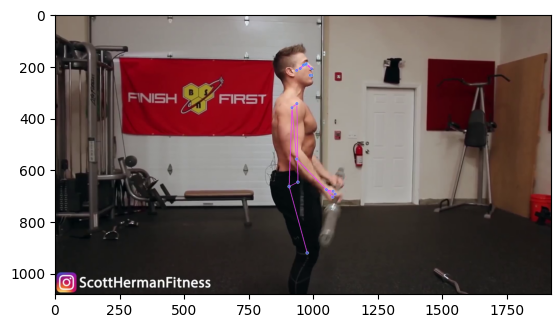

In [24]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [25]:
results.pose_landmarks

landmark {
  x: 0.5164808630943298
  y: 0.19598063826560974
  z: -0.21235914528369904
  visibility: 0.999125063419342
}
landmark {
  x: 0.5070445537567139
  y: 0.1779370754957199
  z: -0.2000878006219864
  visibility: 0.9983105063438416
}
landmark {
  x: 0.5063682794570923
  y: 0.17782707512378693
  z: -0.20014531910419464
  visibility: 0.9978068470954895
}
landmark {
  x: 0.5056080222129822
  y: 0.17765766382217407
  z: -0.20023564994335175
  visibility: 0.9986448884010315
}
landmark {
  x: 0.5049850344657898
  y: 0.17994324862957
  z: -0.23609659075737
  visibility: 0.9988443851470947
}
landmark {
  x: 0.5025838017463684
  y: 0.181345596909523
  z: -0.23613496124744415
  visibility: 0.9985637068748474
}
landmark {
  x: 0.49962157011032104
  y: 0.18328478932380676
  z: -0.23620185256004333
  visibility: 0.9989979863166809
}
landmark {
  x: 0.49326884746551514
  y: 0.19479309022426605
  z: -0.12380136549472809
  visibility: 0.9970331192016602
}
landmark {
  x: 0.4862249493598938
  y: 0

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [ ]:
pose

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zero(132)

In [ ]:
pose

In [ ]:
len(pose)

# Heading

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    return pose

In [ ]:
extract_keypoints(results)

In [9]:
DATA_PATH = os.path.join('MP_Data')
actions=np.array(['biceupcurls'])
no_sequences=30
sequence_length=30

In [10]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action, str(sequence)))
        except:
            pass

In [20]:
folder_path = r'D:\miniproject\biceupnew\side'
for filename in os.listdir(folder_path):
    if filename.endswith('.mp4'):
        file_path = os.path.join(folder_path, filename)
        cap = cv2.VideoCapture(file_path)
        # Set mediapipe model 
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

            # NEW LOOP
            # Loop through actions
            for action in actions:
#                 # Loop through sequences aka videos
#                 for sequence in range(no_sequences):
                    
                    # Loop through video length aka sequence length
                    for frame_num in range(sequence_length):

                        # Read feed
                        ret, frame = cap.read()
                        if not ret:
                            break
                        else:
                            # Make detections
                            image, results = mediapipe_detection(frame, holistic)
            #                 print(results)

                            # Draw landmarks
                            draw_styled_landmarks(image, results)

                            # NEW Apply wait logic
                           
                            cv2.imshow('OpenCV Feed', image)

                            # NEW Export keypoints
                            keypoints = extract_keypoints(results)
                            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                            np.save(npy_path, keypoints)

                            # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [28]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
folder_path = r'D:\miniproject\biceupnew\side'
for filename in os.listdir(folder_path):
    if filename.endswith('.mp4'):
        file_path = os.path.join(folder_path, filename)

        cap = cv2.VideoCapture(file_path)

In [ ]:
!python.exe -m pip install --upgrade pip

In [13]:
folder_path = r'D:\miniproject\biceupnew\side'
i=0
for filename in os.listdir(folder_path):   
    if filename.endswith('.mp4'):
        file_path = os.path.join(folder_path, filename)
        cap = cv2.VideoCapture(file_path)
        # Set mediapipe model 
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

            # NEW LOOP
            # Loop through actions
            for action in actions:
#                 # Loop through sequences aka videos
#                 for sequence in range(no_sequences):
        
                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)
        #                print(results)
                        # Draw landmarks
                    draw_styled_landmarks(image, results)

                        # NEW Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                            # Show to screen
                        cv2.imshow('OpenCV Feed', image)
#                         cv2.waitKey(2000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)

                        # NEW Export keypoints
                        keypoints = extract_keypoints(results)
                        npy_path = os.path.join(DATA_PATH, action, str(i), str(frame_num))
                        np.save(npy_path, keypoints)

                        # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
    i=i+1

cap.release()
cv2.destroyAllWindows()

In [33]:
os.path.join(DATA_PATH, action, str(i), str(frame_num))

'MP_Data\\biceupcurls\\31\\2'

In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

folder_path = r'D:\miniproject\biceupnew\side'
actions = ['action1', 'action2']  # Replace with your list of actions
no_sequences = 10  # Number of sequences per action
sequence_length = 30  # Length of each sequence

# Loop through videos in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('.mp4'):
        file_path = os.path.join(folder_path, filename)
        cap = cv2.VideoCapture(file_path)
        
        # Loop through actions
        for action in actions:
            # Loop through sequences
            for sequence in range(no_sequences):
                # Loop through sequence length
                for frame_num in range(sequence_length):
                    # Read frame from video
                    ret, frame = cap.read()
                    if not ret:
                        break

                    # Perform pose estimation
                    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = holistic.process(image)

                    # Draw landmarks
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    mp_holistic.drawing_utils.draw_landmarks(
                        image, results.pose_landmarks, mp_holistic.pose_connections
                    )

                    # Display frame
                    cv2.imshow('OpenCV Feed', image)
                    
                    # Save keypoints
                    keypoints = np.array([[lm.x, lm.y, lm.z] for lm in results.pose_landmarks.landmark])
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

        cap.release()

cv2.destroyAllWindows()
